In [1]:
import numpy as np 
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/atus-inegi/conjunto_de_datos/atus_anual_2005.csv
/kaggle/input/atus-inegi/conjunto_de_datos/atus_anual_2004.csv
/kaggle/input/atus-inegi/conjunto_de_datos/atus_anual_2021.csv
/kaggle/input/atus-inegi/conjunto_de_datos/atus_anual_2017.csv
/kaggle/input/atus-inegi/conjunto_de_datos/atus_anual_2003.csv
/kaggle/input/atus-inegi/conjunto_de_datos/atus_anual_2012.csv
/kaggle/input/atus-inegi/conjunto_de_datos/atus_anual_2014.csv
/kaggle/input/atus-inegi/conjunto_de_datos/atus_anual_2010.csv
/kaggle/input/atus-inegi/conjunto_de_datos/atus_anual_2007.csv
/kaggle/input/atus-inegi/conjunto_de_datos/atus_anual_2016.csv
/kaggle/input/atus-inegi/conjunto_de_datos/atus_anual_1998.csv
/kaggle/input/atus-inegi/conjunto_de_datos/atus_anual_2006.csv
/kaggle/input/atus-inegi/conjunto_de_datos/atus_anual_2009.csv
/kaggle/input/atus-inegi/conjunto_de_datos/atus_anual_2008.csv
/kaggle/input/atus-inegi/conjunto_de_datos/atus_anual_2011.csv
/kaggle/input/atus-inegi/conjunto_de_datos/atus_anual_2

# Cargar en un Dataframe de pandas los archivos para poder trabajar con ellos

antes de concatenar los archivos, verificamos si se leyeron de forma correcta por que habia algunos archivos que recorrian la primer columna y la utilizaban como indice.

In [2]:
#Años de los archivos que tuvieron el problema antes mencionado: 1997,1998,1999,2000,2001,
#2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,
#2020 y 2021...... osea de 1997-2021

# Leer los archivos para luego unirlos, los primeros 25 tenian problemas con el indice :/

# Lista de años con el indice mal
años = [1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]

# el 2022 que quedo solo por que es el unico sin problemas de indice
añosb = [2022]

# Ruta base donde se encuentran los archivos
base_path = '/kaggle/input/atus-inegi/conjunto_de_datos/atus_anual_{}.csv'

# Lista para almacenar los DataFrames
dfs = []

# Leer cada archivo y agregarlo a la lista de DataFrames
for year in años:
    # Construir la ruta completa del archivo para el año actual
    file_path = base_path.format(year)
    # Leer el archivo y especificar index_col=False
    df1 = pd.read_csv(file_path, index_col =False)
    # Agregar el DataFrame a la lista
    dfs.append(df1)

# Lo mismo para el 2022
for year in añosb:
    file_path = base_path.format(year)
    df2 = pd.read_csv(file_path)
    dfs.append(df2)
    
#comprobar que se leyeran bien    
data_frame = pd.concat(dfs)
print(data_frame.head(2))

   COBERTURA  ID_ENTIDAD  ID_MUNICIPIO  ANIO  MES  ID_HORA  ID_MINUTO  ID_DIA  \
0  Municipal           1             1  1997    1       20          0       7   
1  Municipal           1             1  1997    1       20          0      19   

  DIASEMANA                        URBANA  ... PEATMUERTO PEATHERIDO  \
0    Martes  Accidente en no intersección  ...          0          0   
1   Domingo     Accidente en intersección  ...          0          0   

   CICLMUERTO  CICLHERIDO  OTROMUERTO  OTROHERIDO  NEMUERTO  NEHERIDO  \
0           0           0           0           0         0         0   
1           0           0           0           0         0         0   

      CLASACC           ESTATUS  
0  Sólo daños  Cifras Revisadas  
1    No fatal  Cifras Revisadas  

[2 rows x 45 columns]


Para probar que se cargaron sin problemas los datos probamos checando que la columna anio tenga de valor minimo 1997 que es anio del archivo mas viejo, y valor maximo 22 que es el anio mas reciente del dataset, ademas de el total de registros, que debe ser un numero muy muy grande.

In [3]:
# Imprimir el año más bajo y mas alto
anio_minimo = data_frame['ANIO'].min()
anio_maximo = data_frame['ANIO'].max()
print("El año más bajo en la columna ANIO es:", anio_minimo)
print("El año más alto en la columna ANIO es:", anio_maximo)

#imprimir numero total de registros del dataset
total_registros = data_frame.shape[0]
print("El DataFrame tiene un total de", total_registros, "registros.")

El año más bajo en la columna ANIO es: 1997
El año más alto en la columna ANIO es: 2022
El DataFrame tiene un total de 9943594 registros.


# Preparar datos
En los campos nulos de los registros del dataset colocaremos un 0 para que no haya problemas al utilizar los campos, aunque otra opcion seria borrar los registros que contengan un valor nulo pero eso suena extremo.

In [4]:
#Eliminar filas con valores nulos, esto es opcional ya que mejor lo remplazamos por ceros
#data_frame = data_frame.dropna()

#verificar que los tipos de datos de cada columna sean correcto
#tipos_de_dato = data_frame.dtypes
#print(tipos_de_dato)

#Hacer que la codificacion este correcta para que no haya errores de caracteres.
# Convertir todas las celdas del DataFrame a UTF-8
#data_frame = data_frame.applymap(lambda x: x.encode('latin-1').decode('utf-8', 'ignore'))

#Remplazar valores nulos de registros por 0
data_frame.fillna(0, inplace=True)
#Verificar si hay alguna celda nula en el DataFrame
hay_nulos = data_frame.isnull().any()
if hay_nulos.any():
    print("Hay al menos una celda nula en el DataFrame.")
else:
    print("No hay celdas nulas en el DataFrame.")

No hay celdas nulas en el DataFrame.


listo, terminamos de extraer y cargar los datos, ahora toca responder los ejercicios

# 1.-Mostrar los tipos de accidentes por cada estado
escogimos hacer un mapa por cada tipo de accidente para todos los estados en mexico por que se nos hizo que seria mas comodo y entendible.

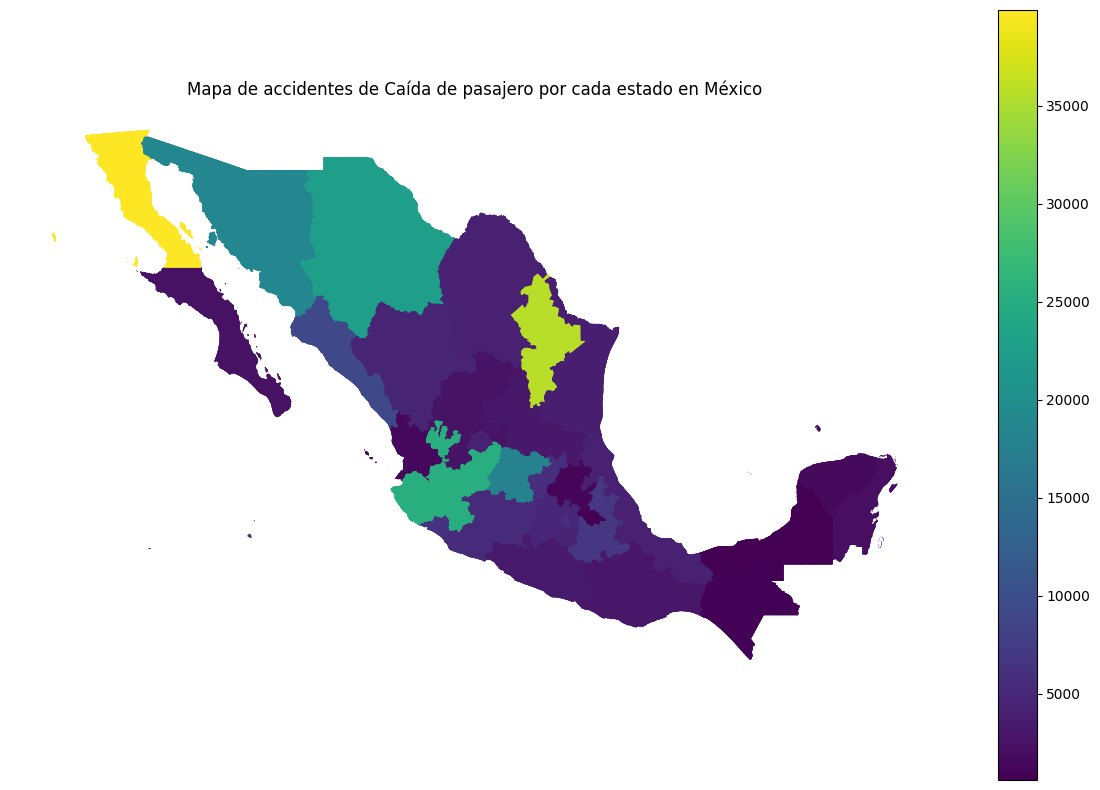

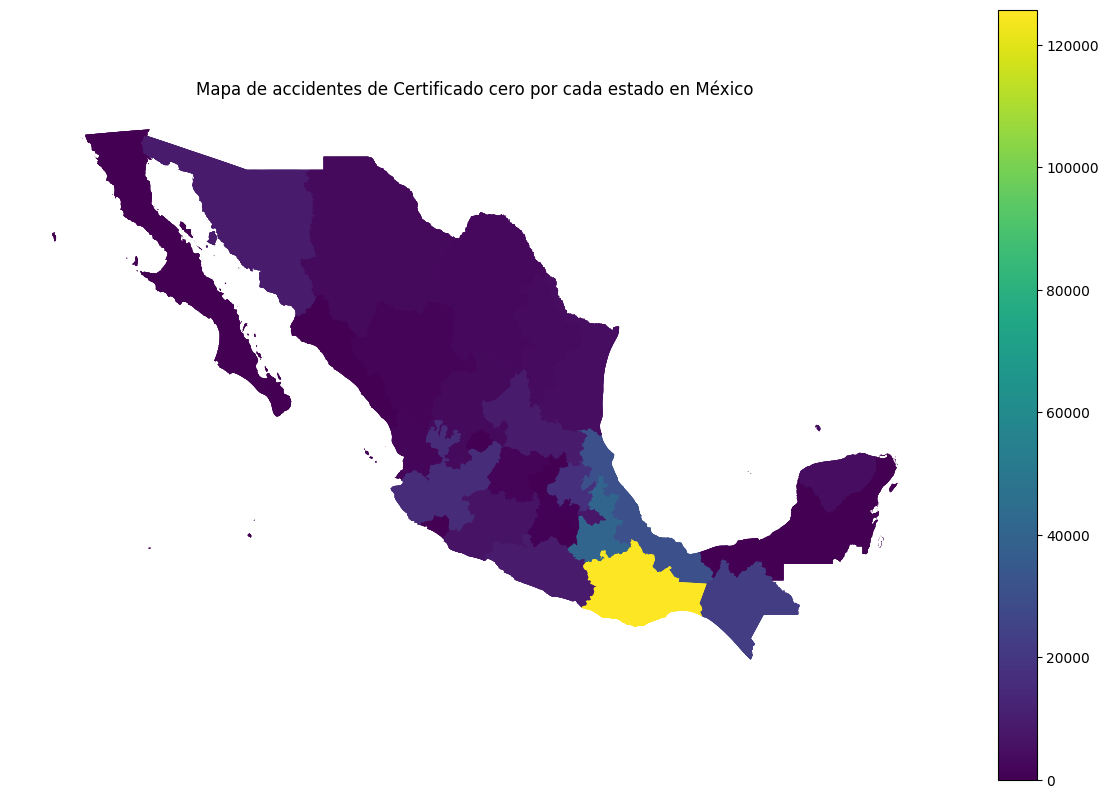

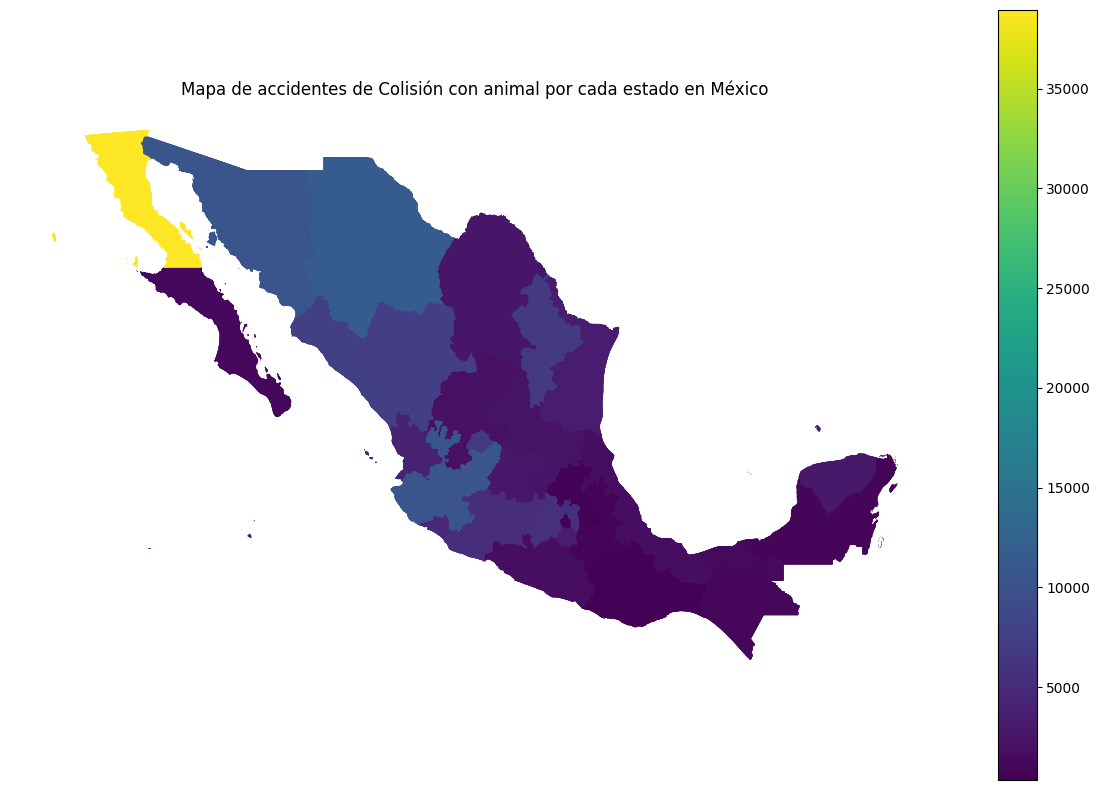

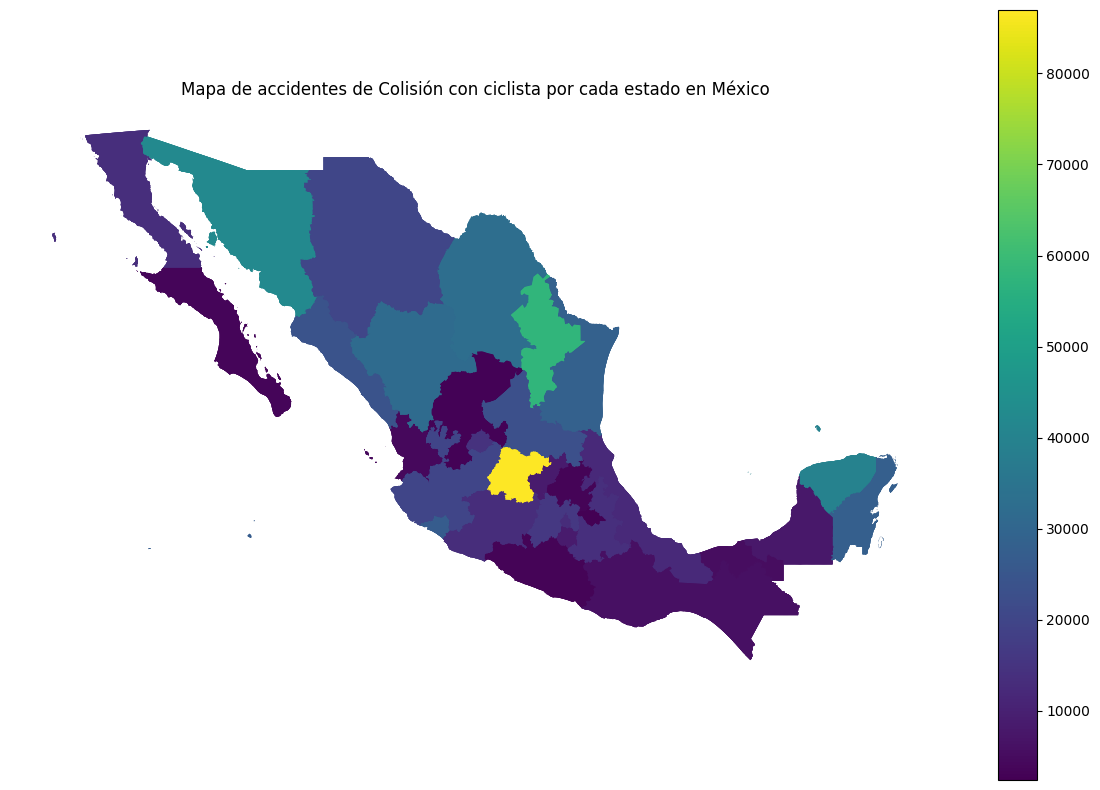

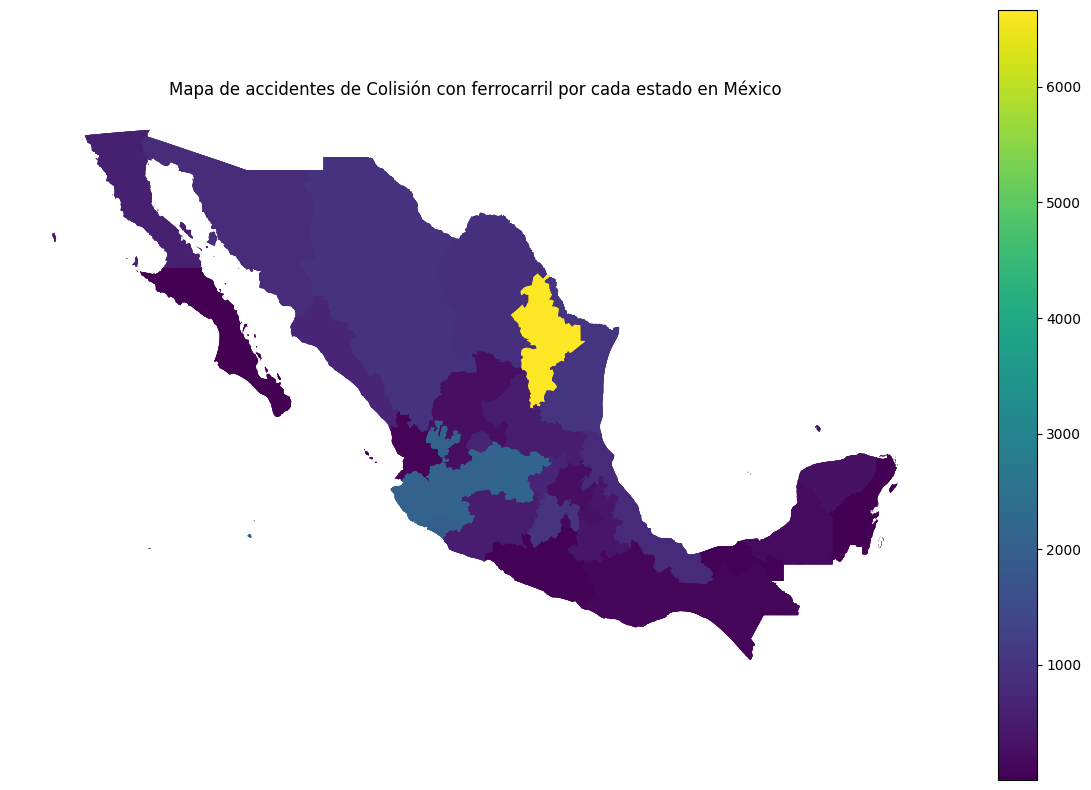

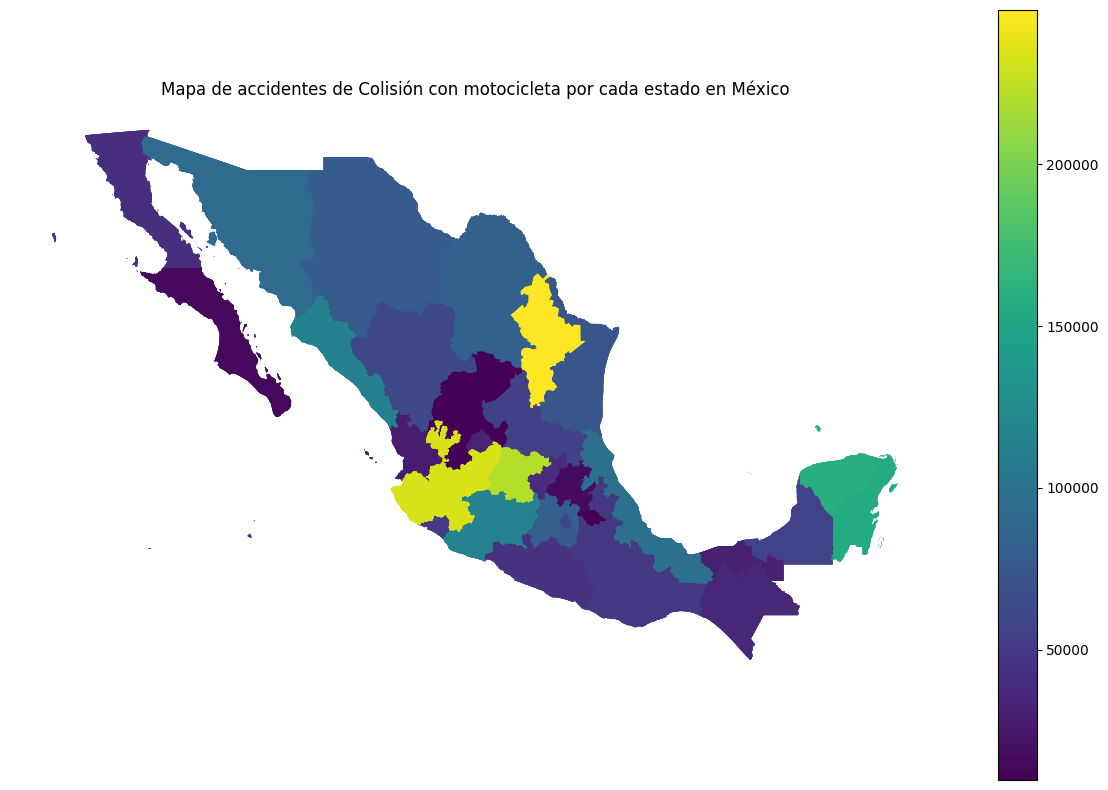

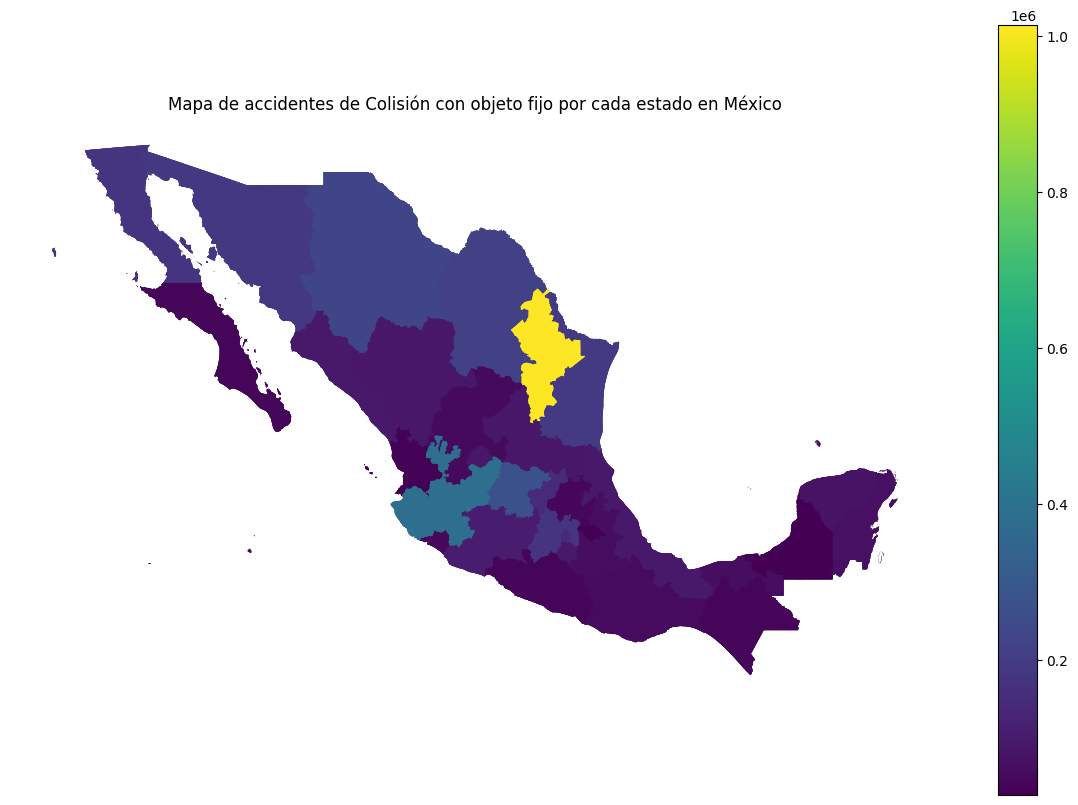

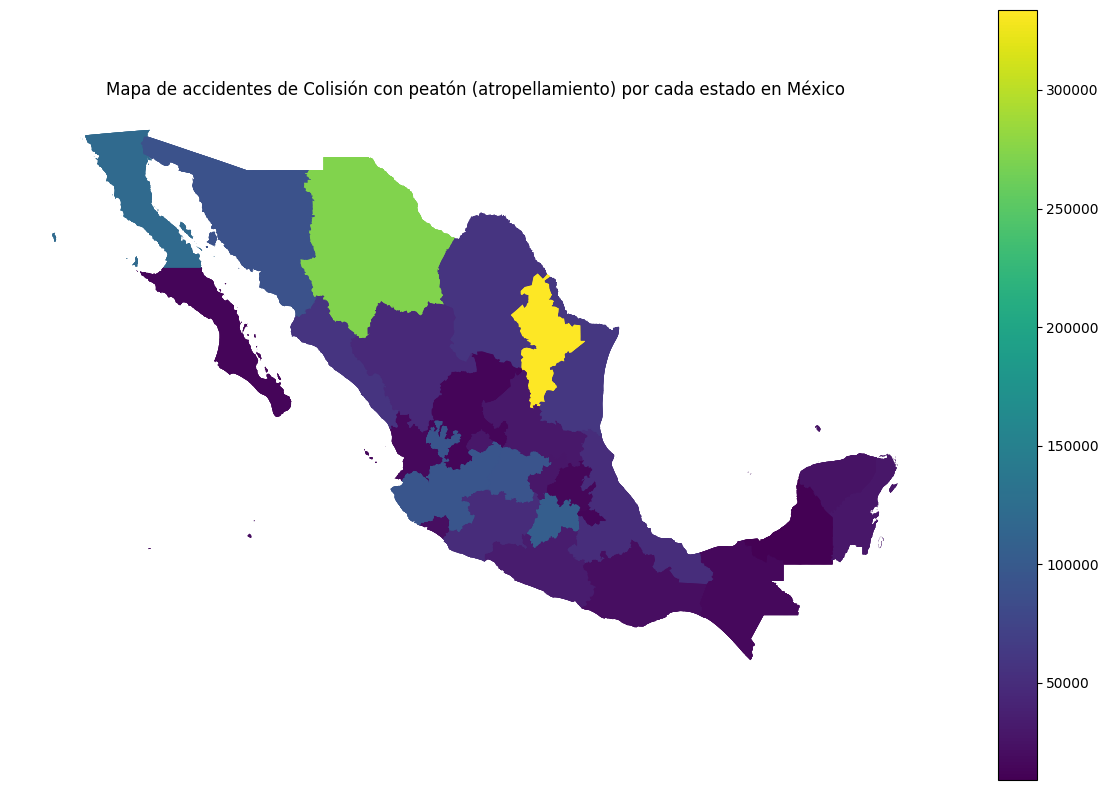

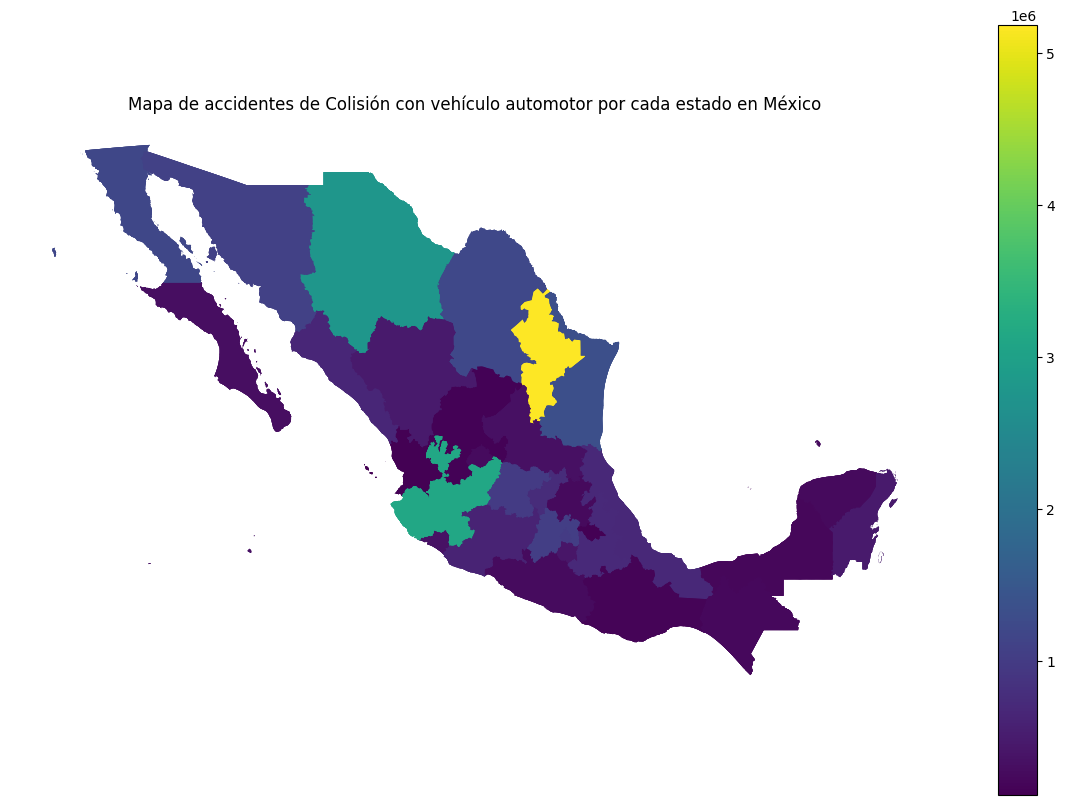

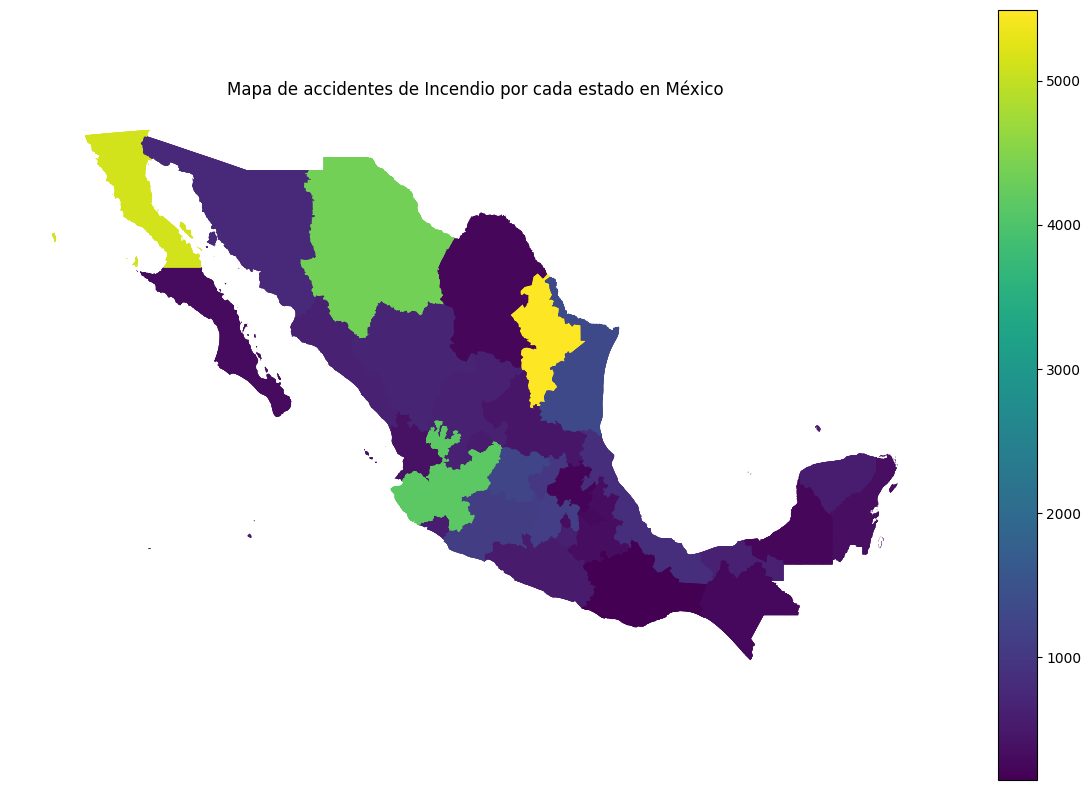

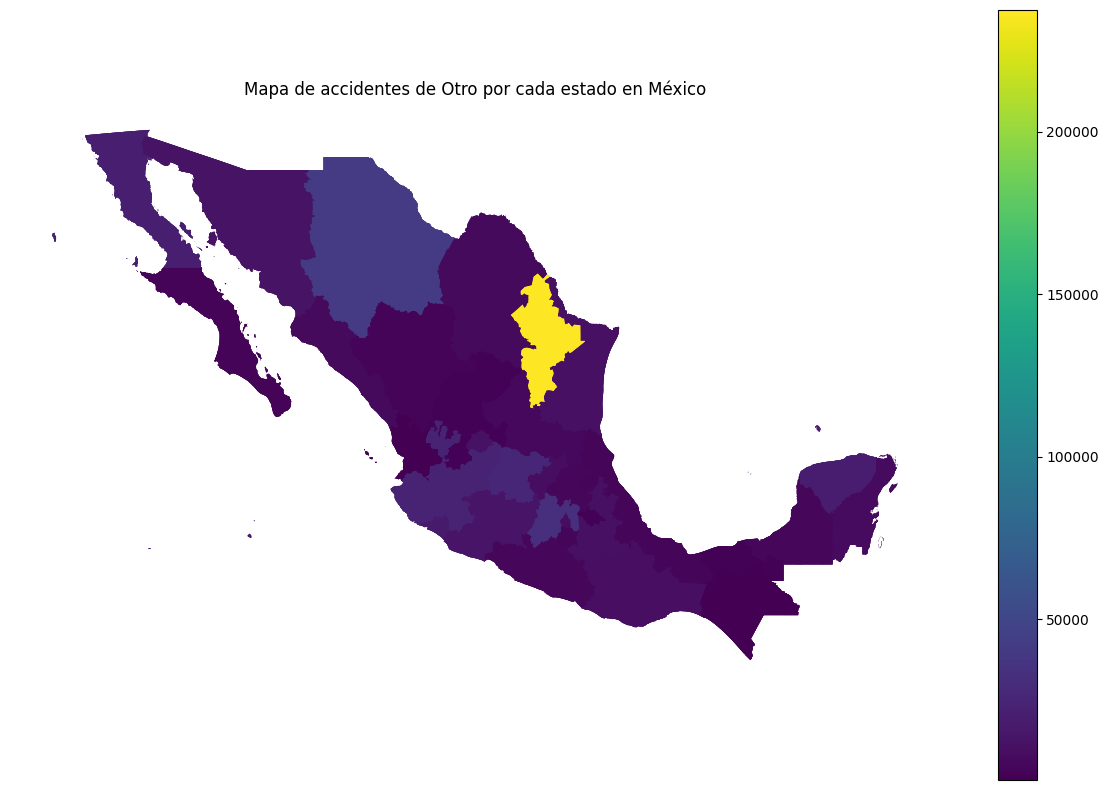

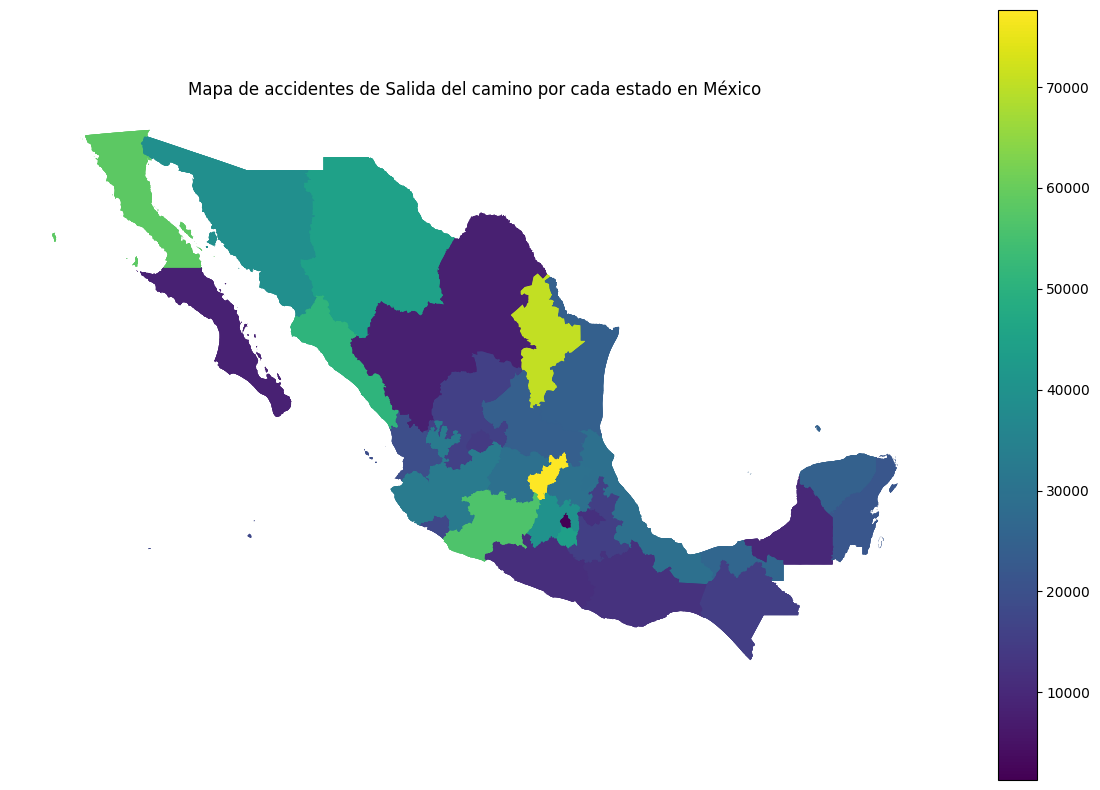

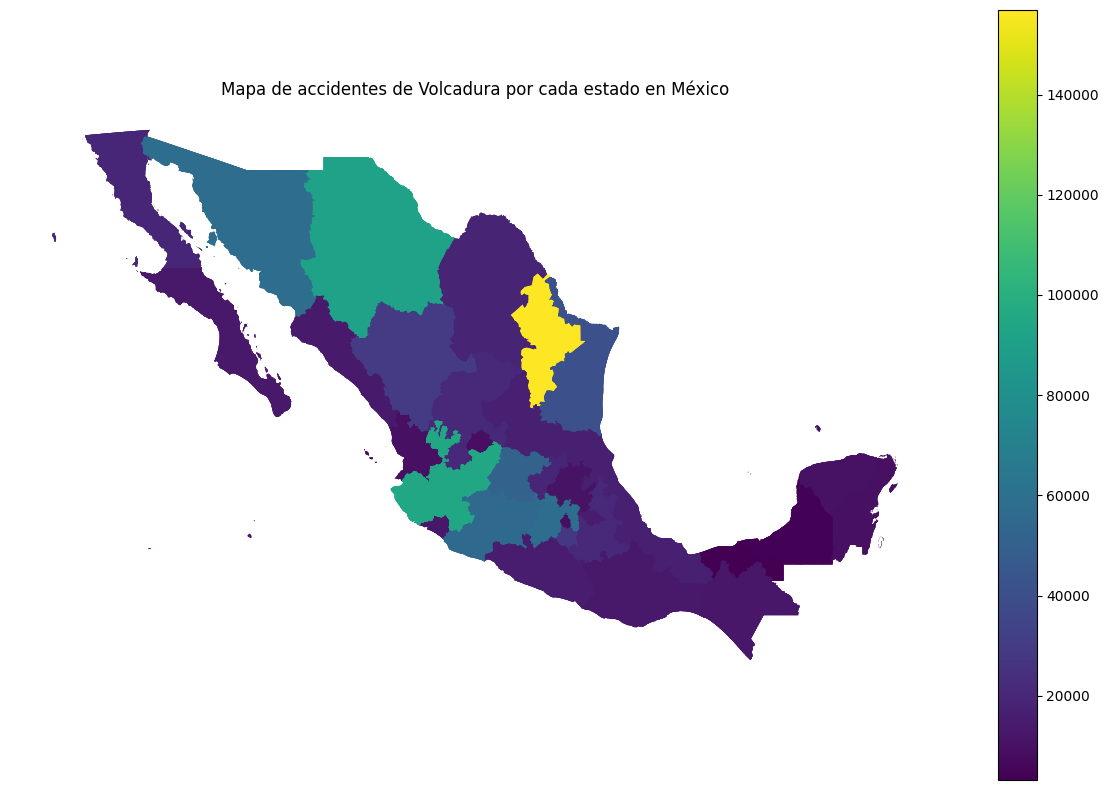

In [5]:
# Crear un nuevo DataFrame solo con las columnas 'ID_ENTIDAD' y 'TIPACCID'
df1 = data_frame[['ID_ENTIDAD', 'TIPACCID']].copy()

# Verificar el nuevo DataFrame
#print(df1.head())

#----------------------------------------------------------------------------------------#

#representar esto, y usar mapa
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el shapefile o geojson (en este caso fue un geojson) de estados de México
mexico = gpd.read_file("/kaggle/input/geojson/georef-mexico-state-millesimepublic.geojson")

# Verificar las primeras filas del DataFrame
#print(mexico.head())

# Extraer el primer elemento de cada lista en la columna 'sta_code' que son como el id_entidad 
# del geojson
mexico['sta_code'] = mexico['sta_code'].apply(lambda x: x[0])

# Convertir la columna 'sta_code' a un tipo de dato numérico por que no venia asi
mexico['sta_code'] = mexico['sta_code'].astype(int)

# Verificar los tipos de datos después de la conversión
#print(mexico.dtypes)

# Crear un nuevo DataFrame solo con las columnas 'ID_ENTIDAD' y 'TIPACCID'
df1 = data_frame[['ID_ENTIDAD', 'TIPACCID']].copy()

# Desagregar las listas en filas individuales en el DataFrame 'df1'
df1_exploded = df1.explode('TIPACCID')

# Fusionar el GeoDataFrame 'mexico' con el DataFrame 'df1_exploded' en la columna 'ID_ENTIDAD' y 'sta_code'
mexico_accidentes = mexico.merge(df1_exploded, left_on='sta_code', right_on='ID_ENTIDAD')

# Desglosar las listas en la columna 'sta_name' en filas individuales
mexico_accidentes_exploded = mexico_accidentes.explode('sta_name')

# Contar el número de accidentes por tipo en cada estado
accidentes_por_estado = mexico_accidentes_exploded.groupby(['sta_code', 'TIPACCID']).size().unstack(fill_value=0)

# Fusionar el GeoDataFrame 'mexico' con el DataFrame 'accidentes_por_estado' en 'sta_code'
mexico_accidentes = mexico.merge(accidentes_por_estado, left_on='sta_code', right_index=True, how='left')


# Visualizar el mapa con todos los tipos de accidentes
# Iterar sobre cada tipo de accidente
for column in accidentes_por_estado.columns:
    # Crear una figura y un eje
    fig, ax = plt.subplots(1, 1, figsize=(15, 10))
    # Visualizar el mapa para el tipo de accidente actual
    mexico_accidentes.plot(column=column, cmap='viridis', legend=True, ax=ax)
    plt.title(f'Mapa de accidentes de {column} por cada estado en México')
    ax.axis('off')  # Desactivar los ejes
    plt.show()

# 2.- Mostrar la cantidad de accidentes por día de la semana en Sinaloa por edad del conductor
Al inicio queriamos mostrar una grafica sola para todos los dias de la semana por edad del conductor, pero mejor decidimos hacer una grafica para cada dia de la semana para mejor visualización.

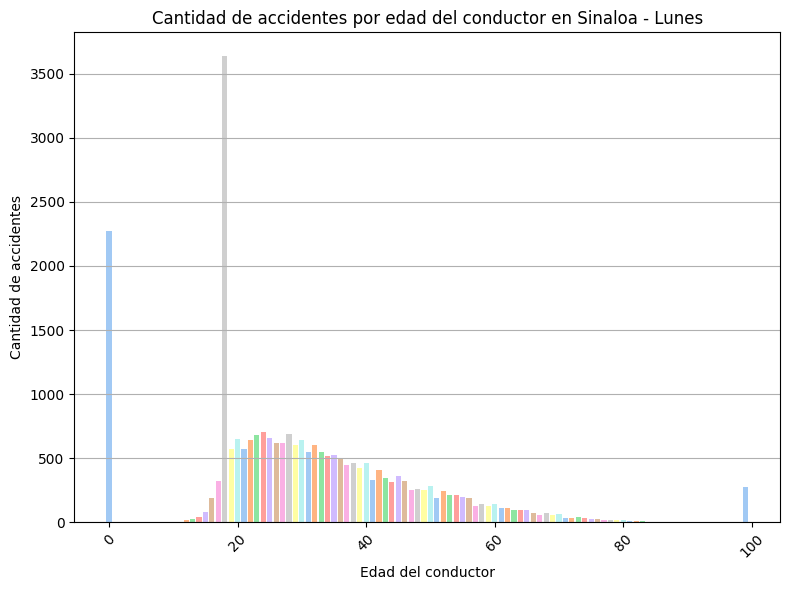

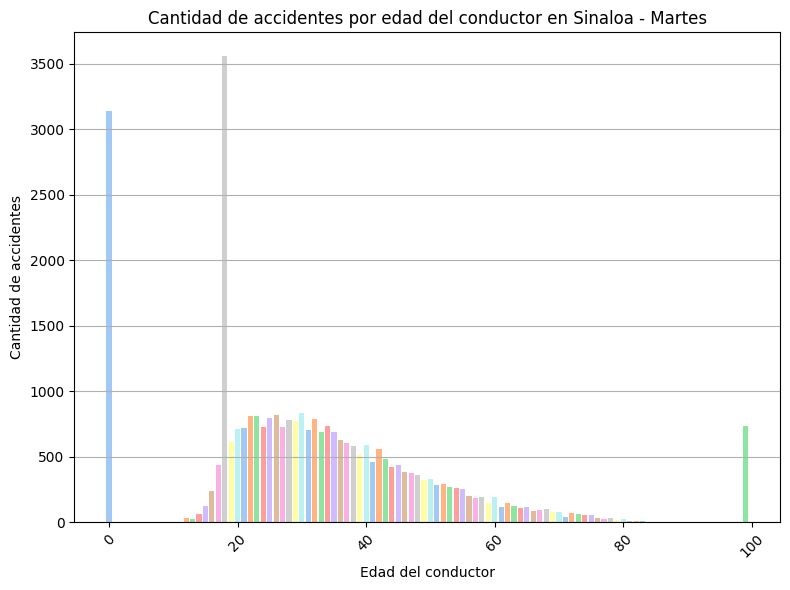

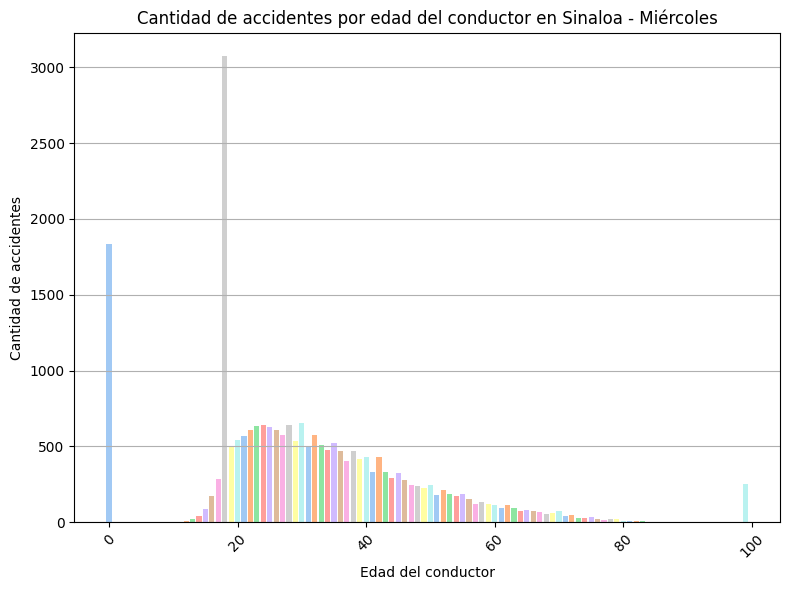

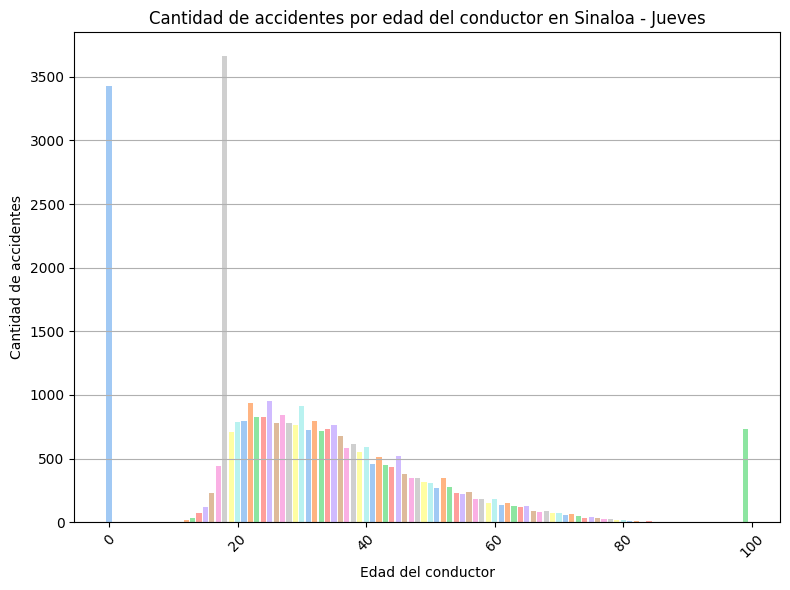

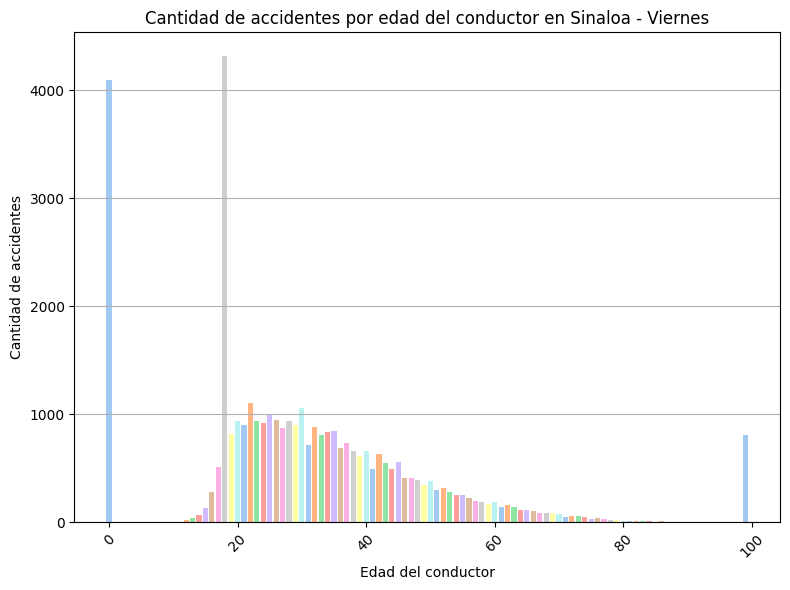

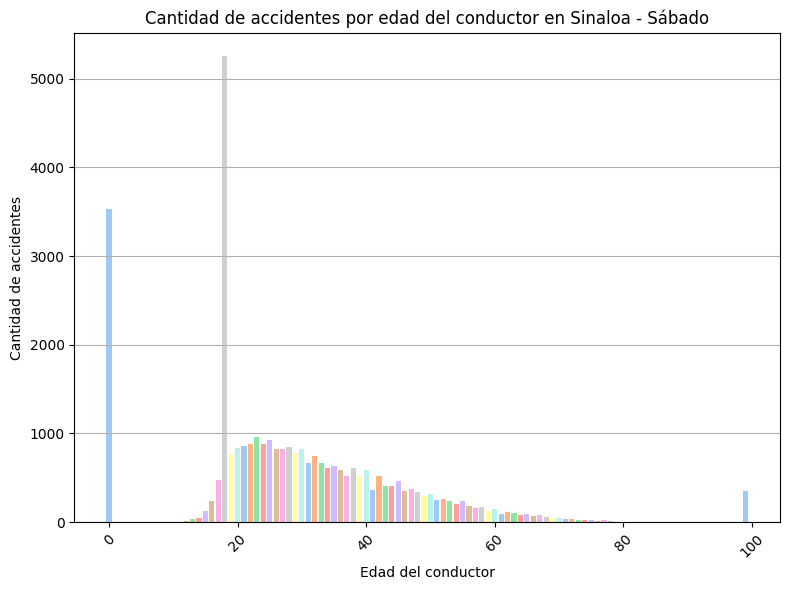

In [6]:
# Crear un nuevo DataFrame solo con las columnas 'ID_ENTIDAD','DIASEMANA' y 'ID_EDAD'
df2 = data_frame[['ID_ENTIDAD', 'DIASEMANA','ID_EDAD']].copy()

# Verificar el nuevo DataFrame
#print(df1.head())

#----------------------------------------------------------------------------------------#

import matplotlib.pyplot as plt

# Filtrar los datos para obtener solo los de Sinaloa
sinaloa_data = df2[df2['ID_ENTIDAD'] == 25]

# Contar la cantidad de accidentes por día de la semana y edad del conductor
accidentes_por_edad_y_dia = sinaloa_data.groupby(['DIASEMANA', 'ID_EDAD']).size().unstack(fill_value=0)

# Crear 1 sola gráfica#
#fig, ax = plt.subplots(figsize=(10, 6))
#accidentes_por_edad_y_dia.plot(ax=ax, marker='o')
#plt.title('Cantidad de accidentes por día de la semana en Sinaloa por edad del conductor')
#plt.xlabel('Día de la semana')
#plt.ylabel('Cantidad de accidentes')
#plt.xticks(range(7), ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo'])
#plt.legend(title='Edad del conductor')
#plt.grid(True)
#plt.show()

# Diccionario para mapear los nombres de los días de la semana a números del 1 al 7
dia_numero = {
    'Lunes': 1,
    'Martes': 2,
    'Miércoles': 3,
    'Jueves': 4,
    'Viernes': 5,
    'Sábado': 6,
    'Domingo': 7
}

# Convertir los nombres de los días de la semana a números del 1 al 7
df2['DIASEMANA_NUMERO'] = df2['DIASEMANA'].map(dia_numero)

# Filtrar los datos para obtener solo los de Sinaloa
sinaloa_data = df2[df2['ID_ENTIDAD'] == 25]
import seaborn as sns

# Utilizar una paleta de colores de seaborn
palette = sns.color_palette("pastel")

# Iterar sobre cada día de la semana
for day in range(1, 7):
    # Filtrar los datos para el día de la semana actual
    day_data = sinaloa_data[sinaloa_data['DIASEMANA_NUMERO'] == day]
    
    # Contar la cantidad de accidentes por edad del conductor
    accidentes_por_edad = day_data.groupby('ID_EDAD').size()
    
    # Crear la gráfica con la paleta de colores
    plt.figure(figsize=(8, 6))
    plt.bar(accidentes_por_edad.index, accidentes_por_edad.values, color=palette)
    plt.title(f'Cantidad de accidentes por edad del conductor en Sinaloa - {list(dia_numero.keys())[list(dia_numero.values()).index(day)]}')
    plt.xlabel('Edad del conductor')
    plt.ylabel('Cantidad de accidentes')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

# 3.-Mostrar el ranking de accidentes por mes por estado en una animación que muestre el comportamiento desde el 1997 hasta el 2023

In [7]:
#codigo